# KeyCLIM figures for Trude

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Figure 1:
One showing only the default NorESM2 & CESM2 SLFs (cloud-top & interior) (if possible, connecting the filled circles and avoiding yellow)

In [19]:
trude_fig1 = CT_SLF_Metric(case_dir)

trude_fig1.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="NorESM2")
# trude_fig1.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
trude_fig1.add_case('CESM2_slfvars', label="CESM2")
# trude_fig1.add_case('CESM2_slfvars', label="CAM6")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


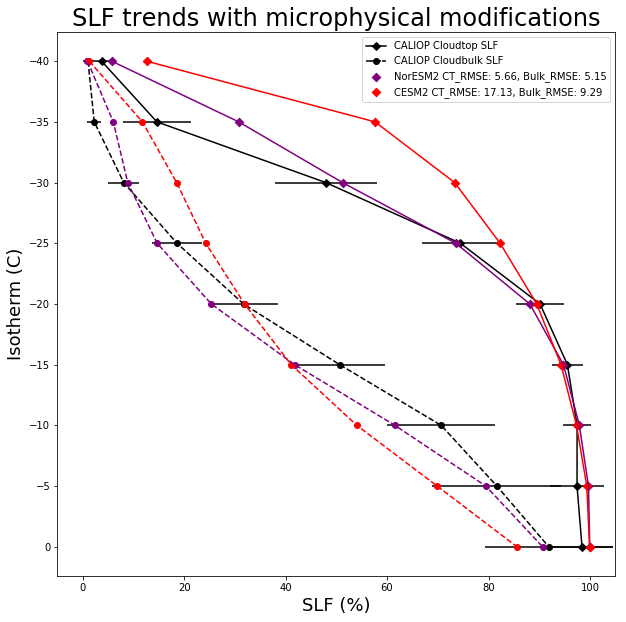

In [22]:
fig1 = trude_fig1.plot_isos_all()

In [25]:
to_png(fig1,"SLF_NorESM2_CESM2")

### Figure 2:
One showing only NorESM2 and NorESM2-ice

In [28]:
trude_fig2 = CT_SLF_Metric(case_dir)

trude_fig2.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="NorESM2")
trude_fig2.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="NorESM2-Ice")

# basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")
# trude_fig1.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
# trude_fig1.add_case('CESM2_slfvars', label="CESM2")
# trude_fig1.add_case('CESM2_slfvars', label="CAM6")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


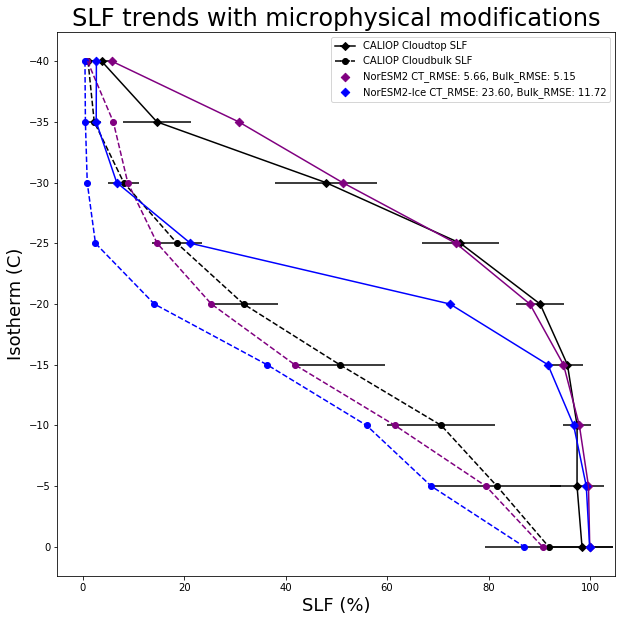

In [29]:
fig2 = trude_fig2.plot_isos_all()

In [30]:
to_png(fig2,"SLF_NorESM2_NorESM2-Ice")

### Figure 3:
One showing only NorESM2-ice and the corresponding fitted runs

In [40]:
trude_fig3 = CT_SLF_Metric(case_dir)

trude_fig3.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="NorESM2-Ice")
trude_fig3.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='NorESM2-Ice \n Fit 1')
trude_fig3.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='NorESM2-Ice \n Fit 2')

# basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")
# trude_fig1.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
# trude_fig1.add_case('CESM2_slfvars', label="CESM2")
# trude_fig1.add_case('CESM2_slfvars', label="CAM6")

Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


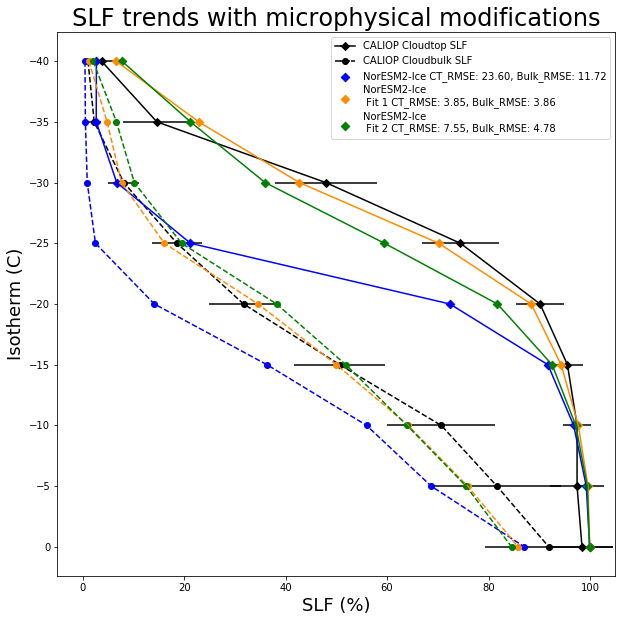

In [42]:
fig3 = trude_fig3.plot_isos_all()

In [43]:
to_png(fig3,"SLF_NorESM2-Ice_fits")